In [169]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import rawpy
import imageio
import shutil
import cv2
from tqdm import tqdm

In [166]:
def convert_ARW2JPG(path, dst_folder):
    fn = path.split('/')[-1][:-4]+'.jpg'
    dst_path = os.path.join(dst_folder, fn)
    with rawpy.imread(path) as raw:
        rgb = raw.postprocess(use_camera_wb=True)

    rgb1 = rgb[:,:,:1].copy()
    rgb2 = rgb[:,:,1:2].copy()
    rgb3 = rgb[:,:,2:3].copy()

    rgb_f = np.concatenate([rgb1, rgb2, rgb3], axis=2)
    plt.imsave(dst_path, rgb_f)

In [170]:
data_folder = '/home/ubuntu/storage/Doc2Answer/download_from_drive/data'
chunk_folders = [fn for fn in os.listdir(data_folder) if 'Cards ' in fn]
card_dst_folder = os.path.join(data_folder, 'Cards')
o7_dst_folder = os.path.join(data_folder, 'O7')

for chunk in chunk_folders:
    chunk_path = os.path.join(data_folder, chunk)
    cards_folders = [os.path.join(chunk_path, fn) for fn in os.listdir(chunk_path) if '_' not in fn and not fn.endswith('.ipynb_checkpoints')]
    o7_folders = [os.path.join(chunk_path, fn) for fn in os.listdir(chunk_path) if '_' in fn and not fn.endswith('.ipynb_checkpoints')]
    print(len(cards_folders), len(o7_folders))
    os.makedirs(card_dst_folder, exist_ok=True)
    os.makedirs(o7_dst_folder, exist_ok=True)
    for card_folder in tqdm(cards_folders):
        fnms = [fn for fn in os.listdir(card_folder) if not fn.endswith('.ipynb_checkpoints')]
        for fn in fnms:
            filepath = os.path.join(card_folder, fn)
            if fn.endswith('arw'):
                convert_ARW2JPG(filepath, card_dst_folder)
            else:
                shutil.copy(filepath, os.path.join(card_dst_folder, fn))
    for o7_folder in tqdm(o7_folders):
        fnms = [fn for fn in os.listdir(o7_folder) if not fn.endswith('.ipynb_checkpoints')]
        for fn in fnms:
            filepath = os.path.join(o7_folder, fn)
            if fn.endswith('arw'):
                convert_ARW2JPG(filepath, o7_dst_folder)
            else:
                shutil.copy(filepath, os.path.join(o7_dst_folder, fn))
    shutil.rmtree(chunk_path)        

  0%|          | 0/5 [00:00<?, ?it/s]

5 5


100%|██████████| 5/5 [00:12<00:00,  2.53s/it]


In [171]:
shutil.rmtree(chunk_path)

In [36]:
rawData = open("./download_from_drive/data/Cards 1_11.03.2021/12503/12503_1a.arw", 'rb').read()
imgSize = (6024, 4024)
# Use the PIL raw decoder to read the data.
# the 'F;16' informs the raw decoder that we are reading 
# a little endian, unsigned integer 16 bit data.
img = Image.frombytes('L', imgSize, rawData, 'raw')

In [37]:
np.array(img).shape

(4024, 6024)

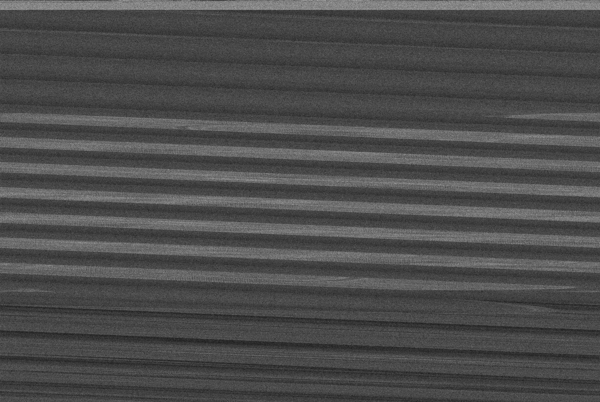

In [39]:
img.resize((6003//10, 4024//10))